In [3]:
%load_ext autoreload
%autoreload 2

import sys
import os
import time

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
# %matplotlib notebook

sys.path.append(os.environ['REPO_DIR'] + '/utilities')
from utilities2015 import *
from registration_utilities import *
from metadata import *
from data_manager import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
import pandas as pd

In [13]:
local_registration_metrics_allStacks_allStructures_allLevels = \
load_data('/home/yuncong/Dropbox/BrainProjectFiguresByTopic/Registration/compare_vs_expert_annotation/measurements/local_registration_metrics_allStacks_allStructures_allLevels.json')


In [15]:
diff_all_stacks_all_structures = \
{stack: {s: np.nanmin([v['centroid_diff_um'] for l, v in x_all_l.iteritems()]) 
         for s, x_all_l in x_all_s_all_l.iteritems()}
 for stack, x_all_s_all_l in local_registration_metrics_allStacks_allStructures_allLevels.iteritems()}

/home/yuncong/MouseBrainAtlas/mousebrainatlas_virtualenv/lib/python2.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: All-NaN axis encountered
  


In [16]:
print 'Median centroid error:', np.nanmedian([y for x in diff_all_stacks_all_structures.values() for y in x.values()]), 'um'


Median centroid error: 42.46399223685412 um


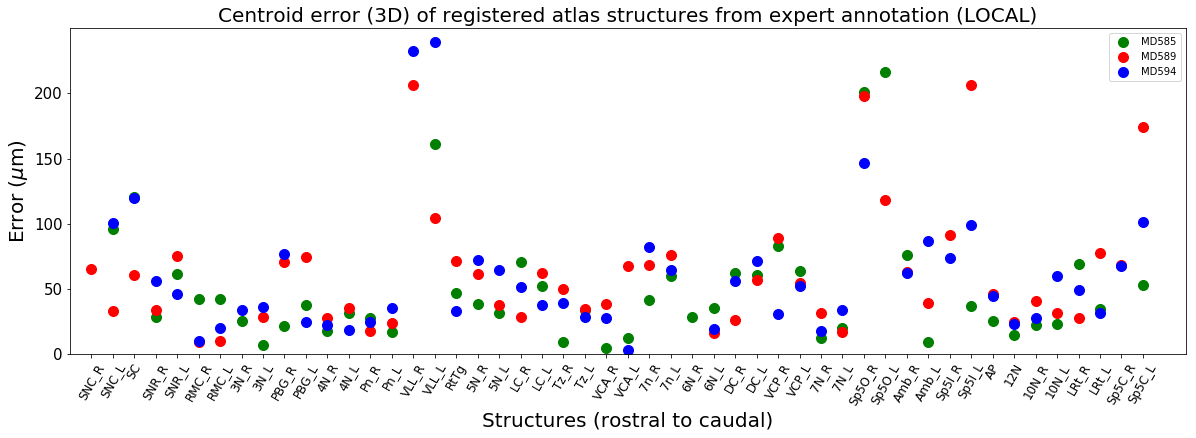

In [17]:
plot_by_stack_by_structure(diff_all_stacks_all_structures, 
                           structures=structures_sided_sorted_by_rostral_caudal_position,
#                            structures=all_known_structures_sided,
#                            yticks=np.arange(0, 300, 50), 
                           yticks=np.arange(0, 201, 50), 
                           yticklabel_fmt='%d',
                           ylabel='Error ($\mu$m)',
                           xlabel='Structures (rostral to caudal)',
                          title='Centroid error (3D) of registered atlas structures from expert annotation (LOCAL)',
                          stack_to_color={'MD589':(255,0,0), 'MD585': (0,127,0), 'MD594': (0,0,255)});

In [24]:
diff_all_stacks_all_structures['MD589']['SNC_R']

65.28906195812559

In [18]:
pd.read_csv('/home/yuncong/Dropbox/BrainProjectFiguresByTopic/Registration/compare_vs_expert_annotation/measurements/centroid_difference_3d_wrt_human_annotation_um.csv')

,Unnamed: 0,MD585,MD589,MD594
0,10N_L,19.755887,38.071301,11.922088
1,10N_R,14.705686,50.469418,33.717258
2,12N,22.388166,29.640847,19.712228
3,3N_L,15.341658,26.392393,85.228228
4,3N_R,83.090312,303.816433,65.159924
5,4N_L,37.206418,110.038539,27.817980
6,4N_R,19.438312,71.271381,27.684434
7,5N_L,38.715011,40.317241,59.665395
8,5N_R,44.534154,61.571711,75.892255
9,6N_L,46.581169,21.799441,18.779579


In [34]:
rms = pd.read_csv('/home/yuncong/Dropbox/BrainProjectFiguresByTopic/UpdateAtlas/measurements/population_rms_x_all_structures_outlierRemoved.csv', header=None).as_matrix()[:,1]

/home/yuncong/MouseBrainAtlas/mousebrainatlas_virtualenv/lib/python2.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


In [36]:
rms.mean()

70.38185360109068

In [37]:
local_registration_metrics_allStacks_allStructures_allLevels = \
load_json('/home/yuncong/Dropbox/BrainProjectFiguresByTopic/Registration/compare_with_CHAT/measurements/local_registration_metrics_allStacks_allStructures_allLevels.json')

In [41]:
local_jaccard_all_stacks_all_structures = \
{stack: {s: np.nanmax([v['centroid_diff_um'] for l, v in x_all_l.iteritems()]) 
         for s, x_all_l in x_all_s_all_l.iteritems()}
 for stack, x_all_s_all_l in local_registration_metrics_allStacks_allStructures_allLevels.iteritems()}

In [44]:
# '/home/yuncong/Dropbox/BrainProjectFiguresByTopic/NatureFinalSubmission/.csv'

pd.DataFrame(local_jaccard_all_stacks_all_structures)

,CHATM2,CHATM3
10N_L,119.559829,184.807548
10N_R,289.917944,314.006844
12N,45.156242,70.731498
3N_L,93.697953,302.627089
3N_R,289.553848,47.688465
4N_L,57.554614,422.459099
4N_R,357.804030,40.825146
5N_L,128.267443,86.200479
5N_R,88.670766,79.817494
6N_L,15.696549,19.968895


In [33]:

# Encoding with JSON makes integer keys appear as str.

def convert_keys_str_to_int(d):
    return {k: {kk: {int(kkk): {int(kkkk): xxxx for kkkk,xxxx in xxx.iteritems()} for kkk, xxx in xx.iteritems()} 
            for kk, xx in x.iteritems()} 
for k, x in d.iteritems()}

In [34]:
peakradius_max_um_allstacks_allstructures_allsteps_allpools = convert_keys_str_to_int(load_data('/home/yuncong/Dropbox/BrainProjectFiguresByTopic/Registration/confidence/measurements/peakradius_max_um_allstacks_allstructures_allsteps_allpools.json'))
peakradius_max_normalized_allstacks_allstructures_allsteps_allpools = convert_keys_str_to_int(load_data('/home/yuncong/Dropbox/BrainProjectFiguresByTopic/Registration/confidence/measurements/peakradius_max_normalized_allstacks_allstructures_allsteps_allpools.json'))
peakradius_min_um_allstacks_allstructures_allsteps_allpools = convert_keys_str_to_int(load_data('/home/yuncong/Dropbox/BrainProjectFiguresByTopic/Registration/confidence/measurements/peakradius_min_um_allstacks_allstructures_allsteps_allpools.json'))
peakradius_min_normalized_allstacks_allstructures_allsteps_allpools = convert_keys_str_to_int(load_data('/home/yuncong/Dropbox/BrainProjectFiguresByTopic/Registration/confidence/measurements/peakradius_min_normalized_allstacks_allstructures_allsteps_allpools.json'))
peakradius_x_um_allstacks_allstructures_allsteps_allpools = convert_keys_str_to_int(load_data('/home/yuncong/Dropbox/BrainProjectFiguresByTopic/Registration/confidence/measurements/peakradius_x_um_allstacks_allstructures_allsteps_allpools.json'))
peakradius_y_um_allstacks_allstructures_allsteps_allpools = convert_keys_str_to_int(load_data('/home/yuncong/Dropbox/BrainProjectFiguresByTopic/Registration/confidence/measurements/peakradius_y_um_allstacks_allstructures_allsteps_allpools.json'))
peakradius_z_um_allstacks_allstructures_allsteps_allpools = convert_keys_str_to_int(load_data('/home/yuncong/Dropbox/BrainProjectFiguresByTopic/Registration/confidence/measurements/peakradius_z_um_allstacks_allstructures_allsteps_allpools.json'))

In [47]:
pool_radius = 100.0

In [48]:
hessian_stepsize = 25

In [68]:
peak_radius_min_normalized_allstacks_allstructures_oneCombination = {
    stack:
    {struct: x[hessian_stepsize][pool_radius]
    for struct, x in x_per_stack.iteritems()}
    for stack, x_per_stack in peakradius_min_normalized_allstacks_allstructures_allsteps_allpools.iteritems()
}

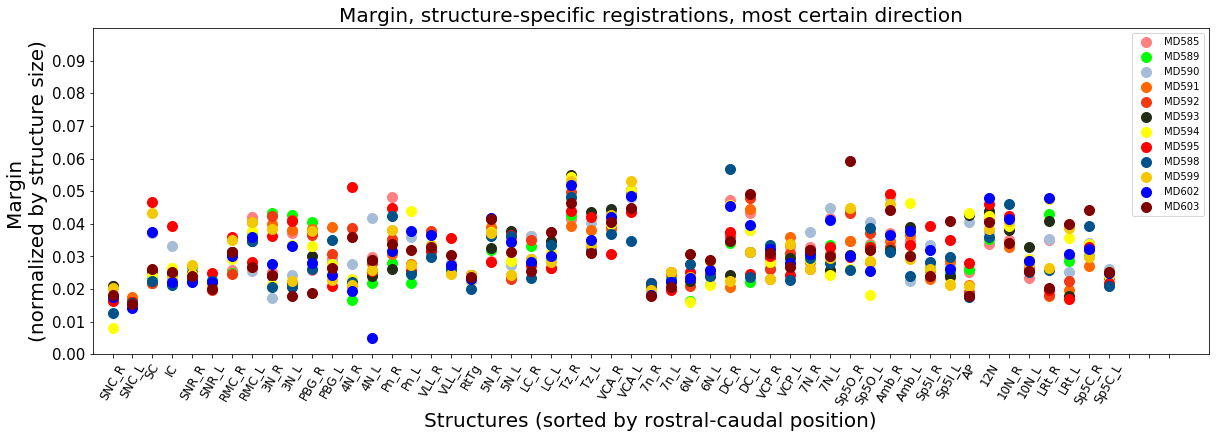

In [70]:
plot_by_stack_by_structure(peak_radius_min_normalized_allstacks_allstructures_oneCombination, 
                           structures=structures_sided_sorted_by_rostral_caudal_position + ['']*3,
                          stack_to_color=stack_to_color,
                          yticks=np.arange(0, 0.1, 0.01),
                           yticklabel_fmt='%.2f',
                          ylabel='Margin \n(normalized by structure size)',
                          title='Margin, structure-specific registrations, most certain direction',
                           xticks_fontsize=12,
                           yticks_fontsize=15,
                          xlabel='Structures (sorted by rostral-caudal position)');

In [39]:
zscores_all_stacks_all_structures_all_poolradius = load_json('/home/yuncong/Dropbox/BrainProjectFiguresByTopic/Registration/confidence/measurements/zscores_all_stacks_all_structures_all_poolradius.json')

In [51]:
zscore_allstacks_allstructures_oneCombination = {
    stack:
    {struct: x[str(pool_radius)][0]
    for struct, x in x_per_stack.iteritems()}
    for stack, x_per_stack in zscores_all_stacks_all_structures_all_poolradius.iteritems()
}

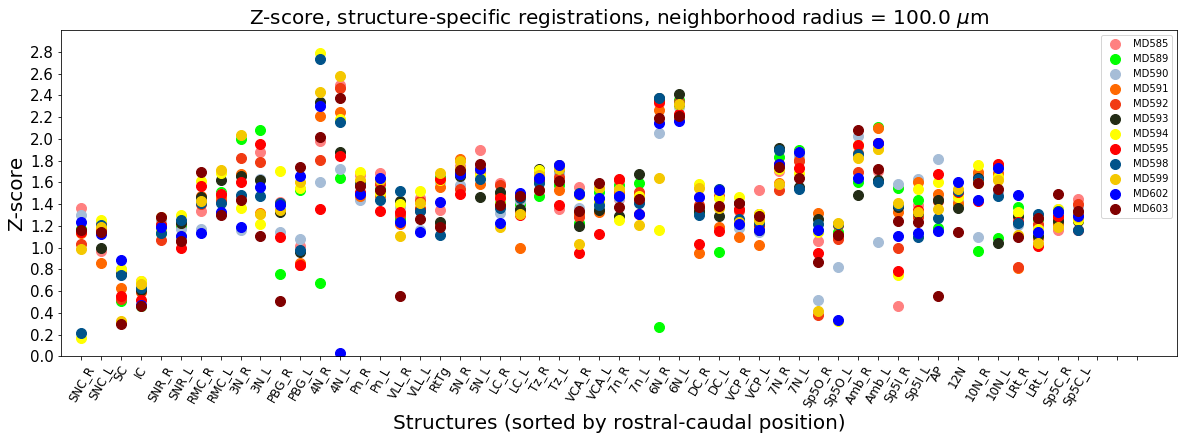

In [54]:
plot_by_stack_by_structure(zscore_allstacks_allstructures_oneCombination, 
                           structures=structures_sided_sorted_by_rostral_caudal_position + ['']*3,
                          stack_to_color=stack_to_color,
                          yticks=np.arange(0, 3, .2),
                           yticklabel_fmt='%.1f',
                          ylabel='Z-score',
                          title='Z-score, structure-specific registrations, neighborhood radius = %.1f $\mu$m' % pool_radius,
                          xlabel='Structures (sorted by rostral-caudal position)',
                           xticks_fontsize=12,
                          );

In [128]:
pd.DataFrame(np.loadtxt('/home/yuncong/Dropbox/BrainProjectFiguresByTopic/Classification/metrics/auroc_all_classifiers_all_structures_simple.txt')).T

,0,1,2
0,0.904309,0.937558,0.816921
1,0.777494,0.834860,0.731252
2,0.872218,0.872790,0.853970
3,0.893814,0.942000,0.790976
4,0.904785,0.947812,0.833686
5,0.976823,0.969336,0.920624
6,0.908886,0.961921,0.849291
7,0.956377,0.965623,0.942482
8,0.942966,0.965446,0.825028
9,0.906100,0.966540,0.893570


In [132]:
for i in ['SNC', 'SC', 'IC', 'SNR', 'RMC', '3N', 'PBG', '4N', 'Pn', 'VLL', 'RtTg', '5N', 'LC', 'Tz', 'VCA', '7n', '6N', 'DC', 'VCP', '7N', 'Sp5O', 'Amb', 'Sp5I', 'AP', '12N', '10N', 'LRt', 'Sp5C']:
    print(i)

SNC
SC
IC
SNR
RMC
3N
PBG
4N
Pn
VLL
RtTg
5N
LC
Tz
VCA
7n
6N
DC
VCP
7N
Sp5O
Amb
Sp5I
AP
12N
10N
LRt
Sp5C


In [123]:
q = pd.read_csv('/home/yuncong/Dropbox/BrainProjectFiguresByTopic/Classification/metrics/auroc_all_classifiers_all_structures_simple.txt', sep=',')

In [124]:
pd.DataFrame(q)

,9.043085317460318739e-01 7.774936666666665275e-01 8.722178333333331368e-01 8.938141666666666874e-01 9.047848180677541263e-01 9.768232866881952914e-01 9.088861386138612497e-01 9.563770226537217090e-01 9.429663333333332398e-01 9.060995000000001687e-01 8.078836666666665556e-01 9.222506666666666630e-01 9.475970000000000226e-01 9.550875968992248444e-01 9.028956666666666520e-01 9.731103936039361413e-01 9.669093567251462185e-01 9.403396653098146096e-01 8.919814999999999827e-01 9.409313333333333418e-01 8.146790000000000420e-01 9.701672043010751700e-01 8.926598333333334301e-01 9.742221102150536716e-01 9.723581666666666345e-01 9.578591160220994993e-01 8.730436666666666623e-01 8.497470000000001411e-01
0,9.375579710144927859e-01 8.348603333333333154e...
1,8.169213947990542346e-01 7.312521666666665920e...


In [135]:
instance_centroids_x_deviations_all_stacks_allstructures_rel2nominal_um = pd.read_csv('/home/yuncong/Dropbox/BrainProjectFiguresByTopic/UpdateAtlas/measurements/instance_centroids_distance_x_from_mean_all_stacks_all_structures_um_outlierRemoved.csv', index_col=0)

In [136]:
all_stacks = ['MD585', 'MD589', 'MD590', 'MD591', 'MD592', 'MD593', 'MD594', 'MD595', 'MD598', 'MD599', 'MD602', 'MD603']
stack_to_color = {n: high_contrast_colors[i%len(high_contrast_colors)] for i, n in enumerate(all_stacks)}

In [146]:
instance_centroids_xyz_deviations_all_stacks_allstructures_rel2nominal_um.T.std()[[
'10N_R',
'12N',
'5N_L',
'5N_R',
'6N_L',
'6N_R',
'7N_L',
'7N_R',
'Amb_L',
'Amb_R']]

AttributeError: 'collections.defaultdict' object has no attribute 'T'

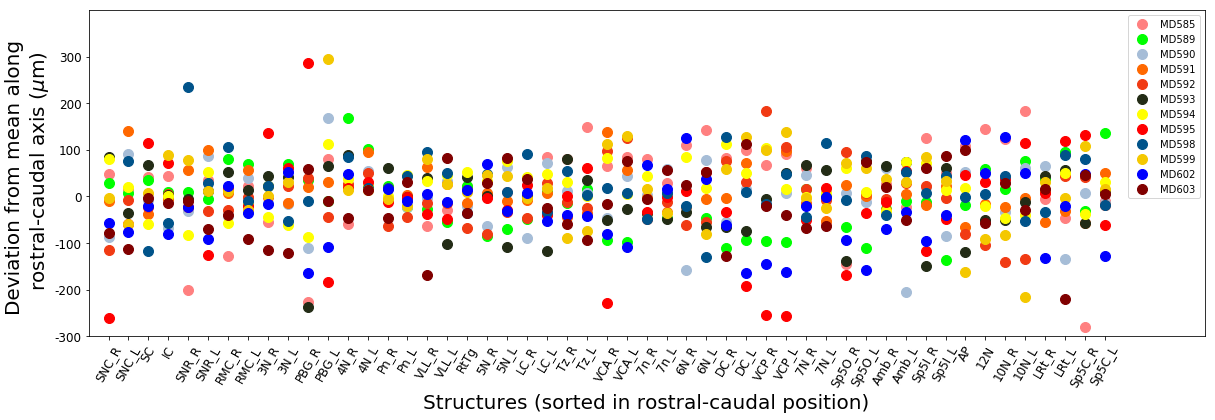

In [137]:
plot_by_stack_by_structure(instance_centroids_x_deviations_all_stacks_allstructures_rel2nominal_um, 
                          structures=structures_sided_sorted_by_rostral_caudal_position,
                          yticks=np.arange(-300, 300+1, 100),
                           yticklabel_fmt='%d',
                          stack_to_color=stack_to_color, 
                          xticks_fontsize=12,
                          yticks_fontsize=12,
                          xlim=[-1, len(structures_sided_sorted_by_rostral_caudal_position)+4],
                          xlabel='Structures (sorted in rostral-caudal position)',
                           ylabel='Deviation from mean along \n rostral-caudal axis ($\mu$m)');

In [7]:
instance_centroids_y_deviations_all_stacks_allstructures_rel2nominal_um = pd.read_csv('/home/yuncong/Dropbox/BrainProjectFiguresByTopic/UpdateAtlas/measurements/instance_centroids_distance_y_from_mean_all_stacks_all_structures_um_outlierRemoved.csv')
instance_centroids_y_deviations_all_stacks_allstructures_rel2nominal_um = instance_centroids_y_deviations_all_stacks_allstructures_rel2nominal_um.set_index('Unnamed: 0')

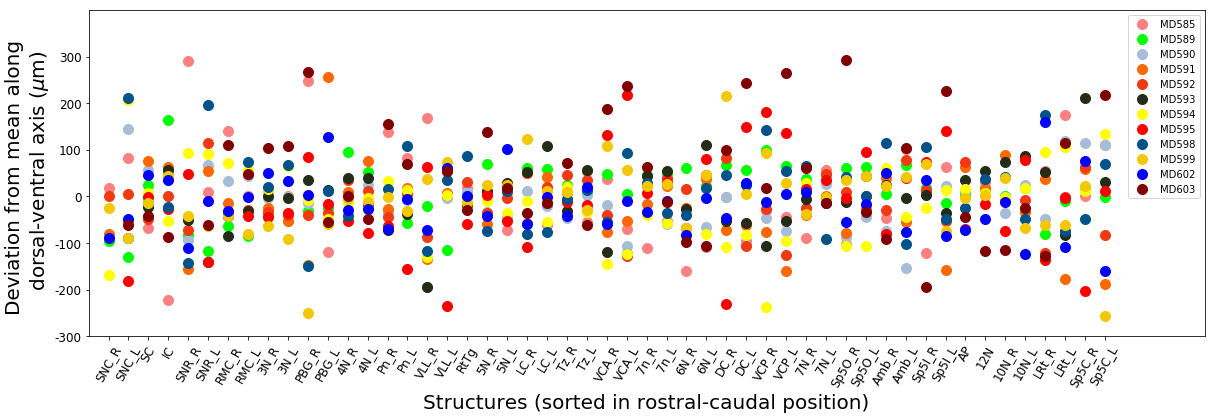

In [8]:
plot_by_stack_by_structure(instance_centroids_y_deviations_all_stacks_allstructures_rel2nominal_um, 
                          structures=structures_sided_sorted_by_rostral_caudal_position,
                          yticks=np.arange(-300, 300+1, 100),
                           yticklabel_fmt='%d',
                          stack_to_color=stack_to_color, 
                          xticks_fontsize=12,
                          yticks_fontsize=12,
                          xlim=[-1, len(structures_sided_sorted_by_rostral_caudal_position)+4],
                          xlabel='Structures (sorted in rostral-caudal position)',
                           ylabel='Deviation from mean along \n dorsal-ventral axis ($\mu$m)');

In [9]:
instance_centroids_z_deviations_all_stacks_allstructures_rel2nominal_um = pd.read_csv('/home/yuncong/Dropbox/BrainProjectFiguresByTopic/UpdateAtlas/measurements/instance_centroids_distance_z_from_mean_all_stacks_all_structures_um_outlierRemoved.csv')
instance_centroids_z_deviations_all_stacks_allstructures_rel2nominal_um = instance_centroids_z_deviations_all_stacks_allstructures_rel2nominal_um.set_index('Unnamed: 0')

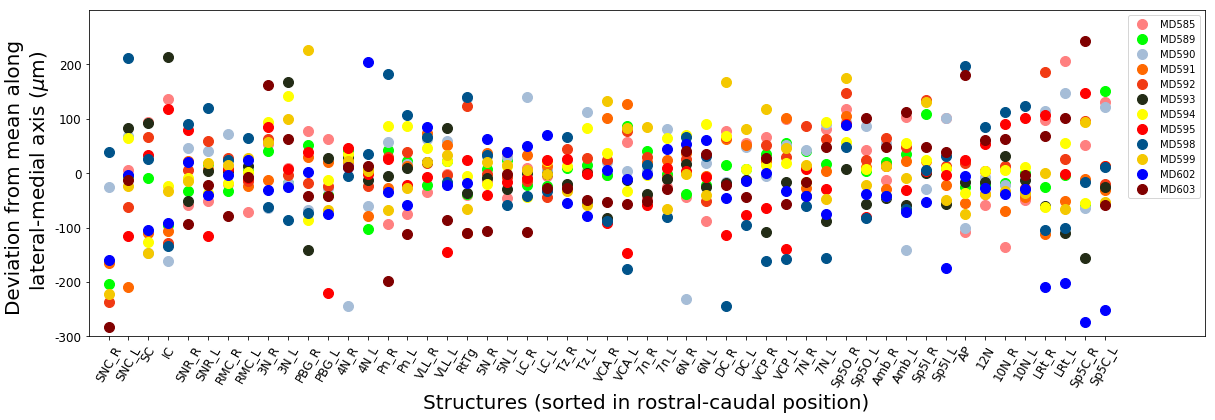

In [10]:
plot_by_stack_by_structure(instance_centroids_z_deviations_all_stacks_allstructures_rel2nominal_um, 
                          structures=structures_sided_sorted_by_rostral_caudal_position,
                          yticks=np.arange(-300, 300, 100),
                           yticklabel_fmt='%d',
                          stack_to_color=stack_to_color, 
                          xticks_fontsize=12,
                          yticks_fontsize=12,
                          xlim=[-1, len(structures_sided_sorted_by_rostral_caudal_position)+4],
                          xlabel='Structures (sorted in rostral-caudal position)',
                           ylabel='Deviation from mean along \n lateral-medial axis ($\mu$m)');

In [23]:
correction_size_normalized = pd.read_csv('/home/yuncong/Dropbox/BrainProjectFiguresByTopic/Registration/compare_vs_expert_annotation/measurements/human_corrections_normalized_by_structure_size.csv', index_col=0)

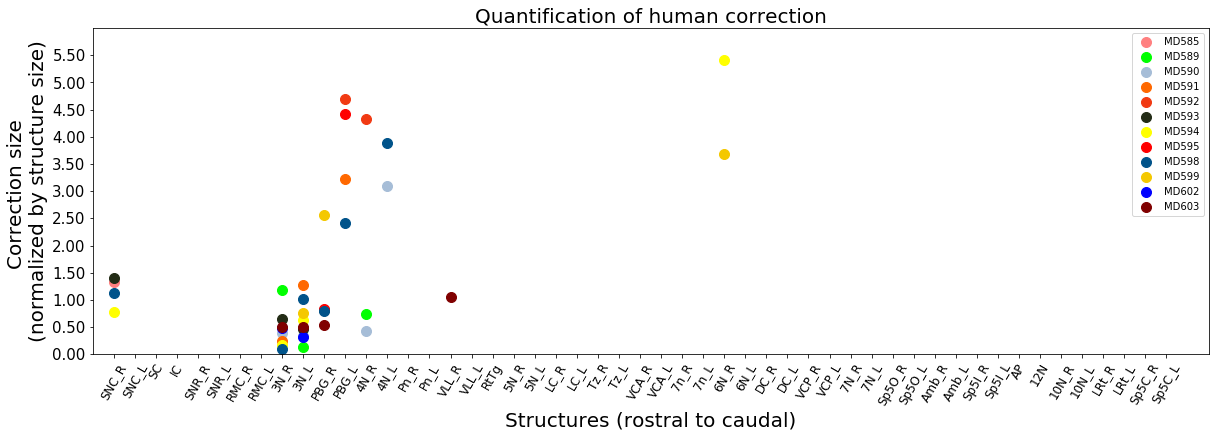

In [31]:
plot_by_stack_by_structure(correction_size_normalized, 
                           structures=structures_sided_sorted_by_rostral_caudal_position,
                           ylabel='Correction size \n(normalized by structure size)',
                           xlabel='Structures (rostral to caudal)',
                           title='Quantification of human correction',
                          yticks=np.arange(0, 6, .5),
                          stack_to_color=stack_to_color);

In [148]:
instance_centroids_deviations_allstructures_rel2nominal_um = \
pd.read_csv('/home/yuncong/Dropbox/BrainProjectFiguresByTopic/UpdateAtlas/measurements/instance_centroids_deviation_3d_from_mean_all_stacks_all_structures_um.csv', index_col=0).to_dict()

In [149]:
instance_centroids_deviations_allstructures_rel2nominal_um \
= {k: {kk: map(float, x[1:-1].split())
   for kk, x in v.items()}
                         for k, v in instance_centroids_deviations_allstructures_rel2nominal_um.items() 
                         }

In [150]:
rms_x = np.sqrt(np.mean([x[0]**2 for v in instance_centroids_deviations_allstructures_rel2nominal_um.values() for x in v.values()]))
rms_y = np.sqrt(np.mean([x[1]**2 for v in instance_centroids_deviations_allstructures_rel2nominal_um.values() for x in v.values()]))
rms_z = np.sqrt(np.mean([x[2]**2 for v in instance_centroids_deviations_allstructures_rel2nominal_um.values() for x in v.values()]))
rms_xyz = np.sqrt(np.mean([np.linalg.norm(x)**2 for v in instance_centroids_deviations_allstructures_rel2nominal_um.values() for x in v.values()]))
print rms_x, rms_y, rms_z, rms_xyz

92.05865230600413 99.94853769441362 116.4905084035267 178.9819661300029


In [261]:
# cutoff_um = 600 # Only show those with deviation less than 600um
cutoff_um = 500 # Only show those with deviation less than 500um

instance_centroids_xyz_deviations_all_stacks_allstructures_rel2nominal_um = defaultdict(dict)
for name_s, x_all_stacks in instance_centroids_deviations_allstructures_rel2nominal_um.iteritems():
    for stack, x in x_all_stacks.iteritems(): 
        if np.linalg.norm(x) >= cutoff_um:
            print 'Removed %s from %s because deviation %d um is more than %d um.' % (name_s, stack, np.linalg.norm(x) , cutoff_um)
        else:
            instance_centroids_xyz_deviations_all_stacks_allstructures_rel2nominal_um[stack][name_s] =  np.linalg.norm(x)
instance_centroids_xyz_deviations_all_stacks_allstructures_rel2nominal_um.default_factory = None

Removed PBG_L from MD598 because deviation 562 um is more than 500 um.
Removed VLL_R from MD603 because deviation 774 um is more than 500 um.
Removed PBG_R from MD599 because deviation 523 um is more than 500 um.
Removed Sp5O_R from MD603 because deviation 1122 um is more than 500 um.
Removed 6N_R from MD590 because deviation 640 um is more than 500 um.
Removed 6N_R from MD589 because deviation 598 um is more than 500 um.
Removed 6N_R from MD599 because deviation 660 um is more than 500 um.
Removed SNC_R from MD593 because deviation 1024 um is more than 500 um.
Removed SNC_R from MD590 because deviation 562 um is more than 500 um.
Removed SNC_R from MD585 because deviation 904 um is more than 500 um.
Removed SNC_R from MD595 because deviation 1118 um is more than 500 um.
Removed SNC_R from MD598 because deviation 550 um is more than 500 um.


In [262]:
instance_centroids_xyz_deviations_all_structures_all_stacks_rel2nominal_um_outlierRemoved = \
pd.DataFrame(instance_centroids_xyz_deviations_all_stacks_allstructures_rel2nominal_um).T.to_dict()

In [267]:
abs_deviation_xyz_all_structures_all_stacks = {s: {stk: np.linalg.norm(x) for stk, x in v.items()}
                     for s, v in instance_centroids_xyz_deviations_all_structures_all_stacks_rel2nominal_um_outlierRemoved.items()}
mean_abs_deviation_xyz_all_structures = {s: np.nanmean(vs.values()) for s, vs in instance_centroids_xyz_deviations_all_structures_all_stacks_rel2nominal_um_outlierRemoved.items()}
stddev_abs_deviation_xyz_all_structures = {s: np.nanstd(vs.values()) for s, vs in instance_centroids_xyz_deviations_all_structures_all_stacks_rel2nominal_um_outlierRemoved.items()}
stderr_abs_deviation_xyz_all_structures = {s: np.nanstd(vs.values())/np.sqrt(len(np.where(~np.isnan(vs.values()))[0])) for s, vs in instance_centroids_xyz_deviations_all_structures_all_stacks_rel2nominal_um_outlierRemoved.items()}
rms_abs_deviation_xyz_all_structures = {s: np.sqrt(np.nanmean(np.array(vs.values())**2)) for s, vs in instance_centroids_xyz_deviations_all_structures_all_stacks_rel2nominal_um_outlierRemoved.items()}
# rms_abs_deviation_xyz_all_structures_remove500um = {s: np.sqrt(np.nanmean(np.array(vs.values())**2)) for s, vs in instance_centroids_xyz_deviations_all_structures_all_stacks_rel2nominal_um_remove500um.items()}

print mean_abs_deviation_x, mean_abs_deviation_y, mean_abs_deviation_z, '\n'

print 'Absolute distance from centroid', '\n'
print 'Mean:', mean_abs_deviation_xyz_all_structures, '\n'
print 'Stddev:', stddev_abs_deviation_xyz_all_structures, '\n'
print 'Stderr:', stderr_abs_deviation_xyz_all_structures, '\n'
print 'RMS:', rms_abs_deviation_xyz_all_structures, '\n'

61.24354410178076 67.50470713479689 66.21350508629085 

Absolute distance from centroid 

Mean: {'LRt_R': 149.35746785452628, 'Sp5C_L': 162.98677797161216, 'Pn_L': 82.14348069099319, '7N_R': 68.49652985457773, 'PBG_L': 158.7601344706308, 'VLL_L': 96.28910945029436, '4N_R': 104.86251047775174, 'VLL_R': 133.17539165577202, '7N_L': 92.12593235987812, 'PBG_R': 187.816195067379, 'RtTg': 87.46624561184255, 'Sp5C_R': 186.7065191737695, 'Pn_R': 104.91498111436793, 'LRt_L': 164.88524821107512, 'Sp5O_R': 149.05285554100064, 'SNR_L': 126.29080415825634, '12N': 83.10694012619368, 'SNR_R': 160.10452136768671, 'Sp5O_L': 96.77508807001497, 'DC_R': 154.6391515507888, 'VCA_L': 174.39072592727936, '3N_L': 119.7066900118317, '6N_R': 102.49867004822185, 'Sp5I_L': 124.31314736718036, '5N_L': 74.46122783031943, 'RMC_R': 86.53470718036446, 'SNC_L': 160.69792899321456, 'SNC_R': 286.02630509810797, 'AP': 125.40083672599012, 'RMC_L': 69.52169347685903, 'Sp5I_R': 143.48159318334055, '3N_R': 117.75986942716817, '

In [270]:
structures_to_show = ['5N_L', '5N_R', '6N_L', '6N_R', '7N_L', '7N_R', 'Amb_L', 'Amb_R', '10N_L', '10N_R', '12N']

for s in structures_to_show:
    print s, ': mean = %.2f; RMS= %.2f; stddev = %.2f; SE = %.2f' % \
    (mean_abs_deviation_xyz_all_structures[s], rms_abs_deviation_xyz_all_structures[s], stddev_abs_deviation_xyz_all_structures[s], stderr_abs_deviation_xyz_all_structures[s])

 5N_L : mean = 74.46; RMS= 78.33; stddev = 24.30; SE = 7.02
5N_R : mean = 73.88; RMS= 85.95; stddev = 43.93; SE = 12.68
6N_L : mean = 105.65; RMS= 113.08; stddev = 40.30; SE = 11.64
6N_R : mean = 102.50; RMS= 114.13; stddev = 50.20; SE = 16.73
7N_L : mean = 92.13; RMS= 102.57; stddev = 45.10; SE = 13.02
7N_R : mean = 68.50; RMS= 72.63; stddev = 24.16; SE = 6.97
Amb_L : mean = 116.58; RMS= 132.03; stddev = 61.97; SE = 17.89
Amb_R : mean = 79.59; RMS= 84.03; stddev = 26.93; SE = 7.77
10N_L : mean = 116.72; RMS= 131.71; stddev = 61.03; SE = 17.62
10N_R : mean = 106.37; RMS= 114.96; stddev = 43.62; SE = 12.59
12N : mean = 83.11; RMS= 91.33; stddev = 37.87; SE = 10.93


In [272]:
save_json({'mean': mean_abs_deviation_xyz_all_structures, 'stddev': stddev_abs_deviation_xyz_all_structures,
           'stderr': stderr_abs_deviation_xyz_all_structures, 'rms': rms_abs_deviation_xyz_all_structures}, 
          '/home/yuncong/Dropbox/BrainProjectFiguresByTopic/UpdateAtlas/measurements/instance_absolute_deviation_3d_from_mean_statistics_all_structures_um_500umCutoff.json')

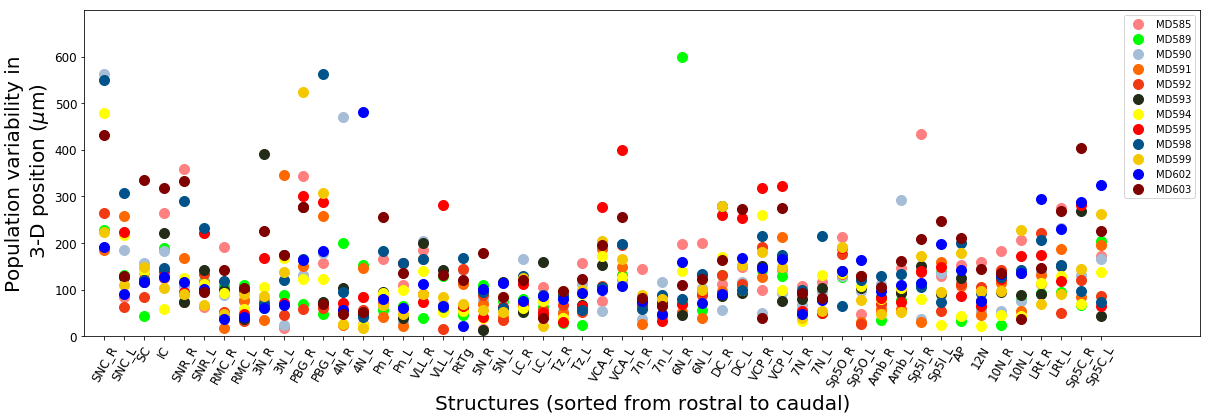

In [130]:
plot_by_stack_by_structure(instance_centroids_xyz_deviations_all_stacks_allstructures_rel2nominal_um, 
                          structures=structures_sided_sorted_by_rostral_caudal_position,
                          yticks=np.arange(0, 700, 100),
                           yticklabel_fmt='%d',
                          stack_to_color=stack_to_color, 
                          xticks_fontsize=12,
                          yticks_fontsize=12,
                          xlim=[-1, len(structures_sided_sorted_by_rostral_caudal_position) + 4],
                          xlabel='Structures (sorted from rostral to caudal)',
                           ylabel='Population variability in\n 3-D position ($\mu$m)');

In [131]:
np.std([131.7119205,
114.964176,
91.32707,
78.326319,
85.953022,
113.076298,
218.172636,
102.572516,
72.632481,
132.027467,
84.02519,])

38.99709373114311